In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [3]:
# zip file
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-27 11:54:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.6MB/s    in 43s     

2020-10-27 11:54:57 (7.11 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# perform the extraction of the zip file
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images']

In [6]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [7]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [8]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [9]:
# create a directory name
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# create train and validation directories
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [10]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [11]:
# breaks the rock directory into data train and data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

# break down the paper directory into data train and data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

# breaks the scissors directory into data train and data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)


In [12]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# create new directories in the train and val directories
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [13]:
# copy the train data and val data to a new directory
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [14]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [15]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [16]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [17]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [18]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [19]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [20]:
# create image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')


In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [22]:
# make a model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [23]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 43s - loss: 1.0751 - accuracy: 0.4150 - val_loss: 0.8339 - val_accuracy: 0.5875
Epoch 2/20
25/25 - 42s - loss: 0.5976 - accuracy: 0.7625 - val_loss: 0.2568 - val_accuracy: 0.9375
Epoch 3/20
25/25 - 42s - loss: 0.3091 - accuracy: 0.8863 - val_loss: 0.2806 - val_accuracy: 0.8875
Epoch 4/20
25/25 - 42s - loss: 0.2129 - accuracy: 0.9312 - val_loss: 0.2756 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 42s - loss: 0.1624 - accuracy: 0.9488 - val_loss: 0.2405 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 42s - loss: 0.1628 - accuracy: 0.9438 - val_loss: 0.2064 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 42s - loss: 0.1256 - accuracy: 0.9563 - val_loss: 0.2230 - val_accuracy: 0.9375
Epoch 8/20
25/25 - 42s - loss: 0.1562 - accuracy: 0.9563 - val_loss: 0.1725 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 42s - loss: 0.1300 - accuracy: 0.9575 - val_loss: 0.1579 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 42s - loss: 0.1350 - accuracy: 0.9525 - val_loss: 0.1656 - val_accuracy: 0.9688
Epoch 11/

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
scissors


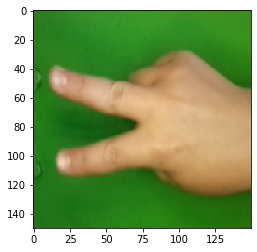

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

In [30]:
print ("==================================================")
print ("                 Biodata Diri                     ")
print ("==================================================")
print ("Nama Lengkap : Ledi Diniyatullah")
print ("Username : ldiniyatullah")
print ("Nomer Telepon : +6285155056703")
print ("Alamat : Ngawi")
print ("Institusi Saat ini : Universitas Darussalam Gontor")
print ("Pekerjaan : Mahasiswa")
print ("==================================================")

                 Biodata Diri                     
Nama Lengkap : Ledi Diniyatullah
Username : ldiniyatullah
Nomer Telepon : +6285155056703
Alamat : Ngawi
Institusi Saat ini : Universitas Darussalam Gontor
Pekerjaan : Mahasiswa
